## Load dataset

In [1]:
import pandas as pd
from google.colab import files
import io
uploaded = files.upload()
yelp_df = pd.read_csv(io.BytesIO(uploaded['open_source_1.csv']))

Saving open_source_1.csv to open_source_1.csv


## Principal component analysis
1. Preparing data; Retreive all category columns and perform binary encoding 
2. Fit data to pca
3. Visualize PCA

In [2]:
!pip install category_encoders
import category_encoders as ce
cat_cols = yelp_df.drop(columns=['score','rating','business_id','rating_strength']).columns.values
be= ce.BinaryEncoder(cols= cat_cols,drop_invariant=True).fit(yelp_df)
df= be.transform(yelp_df)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.6 MB/s eta 0:00:00


In [3]:
from sklearn.decomposition import PCA
X = df.drop(columns=['score','business_id','rating_strength']).to_numpy()
pca= PCA(n_components=2,random_state=42)
pca.fit(X)
x_pca = pca.transform(X)

Text(0, 0.5, 'Second PCA')

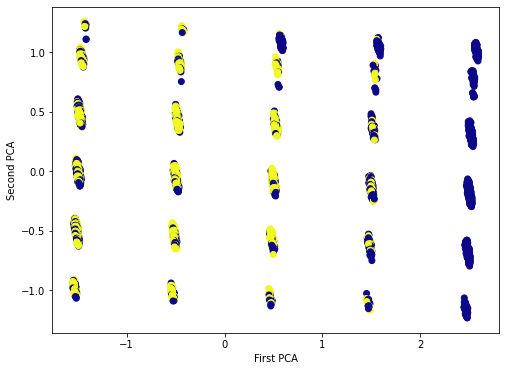

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['score'],cmap='plasma')
plt.xlabel('First PCA')
plt.ylabel('Second PCA')

## TSNE analysis

1. fitting pca data into tsne 
2. visualizing tsne

In [5]:
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
pca_tsne= Pipeline([("pca", PCA(n_components= 2, random_state=33)),
                    ("tsne", TSNE(n_components=2,
                                  perplexity= 170,
                                  random_state=33, 
                                  learning_rate= 350, 
                                  n_iter= 5000,
                                  n_jobs=-1,
                                  n_iter_without_progress=150,
                                  verbose=1))])


In [6]:
df_pca_tsne_reduced= pca_tsne.fit_transform(X)

[t-SNE] Computing 511 nearest neighbors...
[t-SNE] Indexed 4372 samples in 0.006s...
[t-SNE] Computed neighbors for 4372 samples in 0.413s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4372
[t-SNE] Computed conditional probabilities for sample 2000 / 4372
[t-SNE] Computed conditional probabilities for sample 3000 / 4372
[t-SNE] Computed conditional probabilities for sample 4000 / 4372
[t-SNE] Computed conditional probabilities for sample 4372 / 4372
[t-SNE] Mean sigma: 0.031653
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.259201
[t-SNE] KL divergence after 5000 iterations: 0.057544


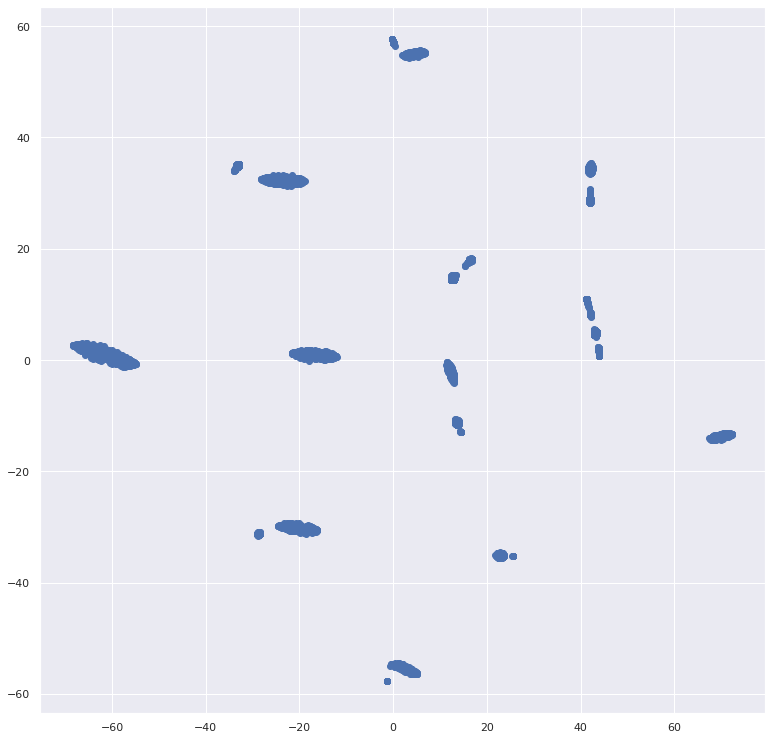

In [10]:
import seaborn as sns
plt.scatter(df_pca_tsne_reduced[:,0], df_pca_tsne_reduced[:,1])
plt.show()

## Kmeans trainning

1. Fitting pca_tsne data into model
2. Find optimal k clusters
3. Visualize k clusters and their score
4. Visualizing k means labels compared to tsne fitted with pca

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

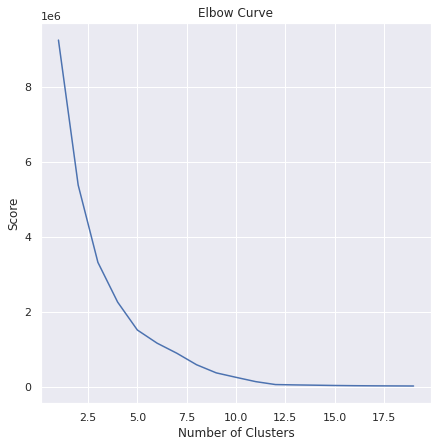

In [11]:
from sklearn.cluster import KMeans

sns.set(rc= {'figure.figsize': (7,7)})
number_of_clusters = range(1,20)


kmeans = [KMeans(n_clusters=i,max_iter=1000,random_state=33) for i in number_of_clusters]
score = [-1*kmeans[i].fit(df_pca_tsne_reduced).score(df_pca_tsne_reduced) for i in range(len(kmeans))]


plt.plot((number_of_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 5848868.5.
Iteration 1, inertia 3670030.5.
Iteration 2, inertia 3369898.0.
Iteration 3, inertia 3327784.5.
Iteration 4, inertia 3316854.0.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 4503672.0.
Iteration 1, inertia 3543579.0.
Iteration 2, inertia 3491960.5.
Iteration 3, inertia 3431829.5.
Iteration 4, inertia 3426289.5.
Iteration 5, inertia 3420169.25.
Iteration 6, inertia 3381840.25.
Iteration 7, inertia 3374118.5.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 4311234.0.
Iteration 1, inertia 3675915.75.
Iteration 2, inertia 3445372.5.
Iteration 3, inertia 3328503.0.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 4207160.0.
Iteration 1, inertia 3357155.75.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4813721.5.
Iteration 1, inertia 3680318.0.
Iteration 2, inertia

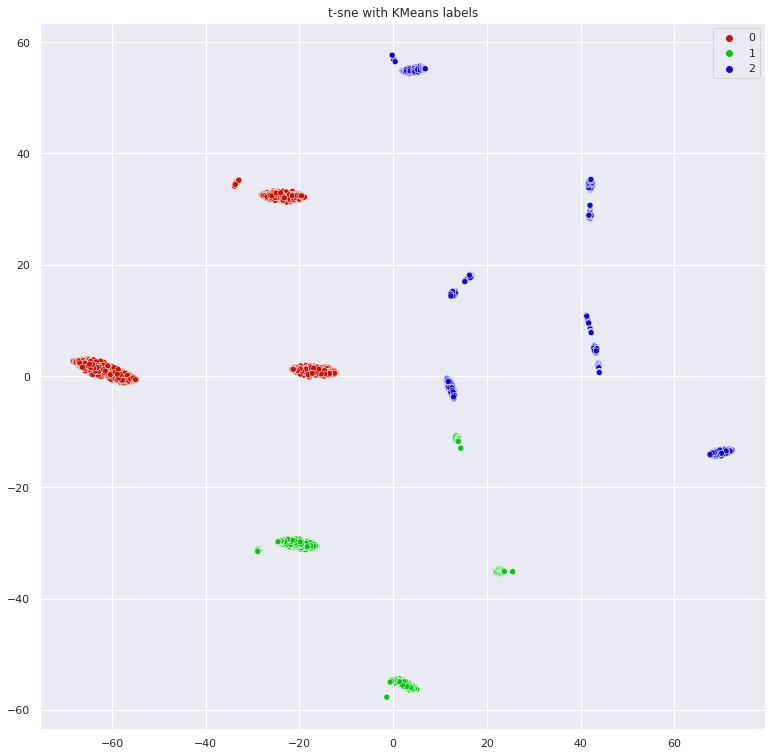

In [13]:
k_means_test = KMeans(n_clusters=3, max_iter=1500, random_state=33,verbose=1)
-1*k_means_test.fit(df_pca_tsne_reduced).score(df_pca_tsne_reduced)
y_pred= k_means_test.labels_
palette = sns.hls_palette(3, l=.4, s=.9)
sns.set(rc= {'figure.figsize': (13,13)})
sns.scatterplot(x=df_pca_tsne_reduced[:,0], y=df_pca_tsne_reduced[:,1], hue= y_pred, legend='full', palette=palette)
plt.title("t-sne with KMeans labels")
plt.show()

## Preprocessing data for LDA model
1. Removal of special chatacters, stop words, and lemmatize text
2. Make bigrams for better classifcation

In [16]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
def get_stop_words(words_to_exclude=[],language='english'):
  all_stop_words = stopwords.words(language.lower())
  if len(words_to_exclude)!=0:
    for word in words_to_exclude:
      all_stop_words.remove(word)
  return all_stop_words
def lemmatize_text(paragraph):
  words_excluded = []
  all_stop_words = get_stop_words(words_excluded)
  lemmatization= WordNetLemmatizer()
  
  review = re.sub('[^a-zA-Z]',' ',paragraph)
  review = review.lower()
  # Tokenization
  review= review.split()
  review = [lemmatization.lemmatize(word) for word in review if word not in set(all_stop_words)]
  review =' '.join(review)
  return review
def filter_noun(text):
  is_noun = lambda pos: pos[0:2]== 'NN'
  text_split = text.split()
  nouns_adj = [word for (word,pos) in pos_tag(text_split) if is_noun(pos)]
  return nouns_adj  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [17]:
clean_df = yelp_df['text'].apply(lemmatize_text).apply(filter_noun)

In [18]:
from gensim.models.phrases import Phrases, Phraser
docs= list(clean_df)
phrases = Phrases(docs, min_count=10, threshold=20)
bigram_model = Phraser(phrases)
def make_bigrams(texts):
    return [bigram_model[doc] for doc in texts]

# Form Bigrams
data_words_bigrams = make_bigrams(docs)

In [19]:
# Conver bigrams to dictionary
import gensim
from gensim import corpora
dictionary= corpora.Dictionary(data_words_bigrams)

# Filter out words that occur less than 20 documents, or more than 70% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.7)
corpus = [dictionary.doc2bow(doc) for doc in docs]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 420
Number of documents: 4372


## LDA model and anaylsis

In [20]:
from gensim.models.ldamulticore import LdaMulticore
import numpy as np
passes= 150
np.random.seed(1) 
ldamodel= LdaMulticore(corpus, 
                    id2word=dictionary, 
                    num_topics=4, 
                    alpha='asymmetric', 
                    chunksize= 4000, 
                    batch= True,
                    minimum_probability=0.001,
                    iterations=350,random_state=1,
                    passes=passes)   

In [21]:
ldamodel.show_topics(num_words=3, formatted=False)

[(0,
  [('pizza', 0.034946512), ('place', 0.024912855), ('service', 0.021931747)]),
 (1, [('food', 0.092712626), ('great', 0.07851582), ('good', 0.048668966)]),
 (2, [('place', 0.039198488), ('car', 0.022928497), ('coffee', 0.022765012)]),
 (3, [('time', 0.08654103), ('review', 0.059025995), ('place', 0.0421923)])]

In [ ]:
# ldamodel topics 
categories_dict = {
    0:"others",
    1:"food" ,
    2:"experience",
    3: "service"

}